In [3]:
from file import readFile
import pandas as pd
from prophet import Prophet
dailyData = readFile('dailies')

Importing plotly failed. Interactive plots will not work.


In [7]:
for item in dailyData:
  for att in item['attractions']:
    if att['name'] == 'attSoaringOverHorizon;entityType=Attraction;destination=shdr':
      item['value'] = att['value']
  # pptTotal = 0
  # for wea in item['weathers']['pptHours']:
  #   pptTotal += wea[1]
  # item['pptTotal'] = pptTotal

In [8]:
dataset = pd.json_normalize(dailyData)
dataset = dataset.query('value>0')

In [9]:
dataset['dateInde'] = pd.to_datetime(dataset['date'])
dataset = dataset.set_index('dateInde', drop=True)

badweathers = pd.DataFrame({
  'holiday': 'badweathers',
  'ds': pd.to_datetime(dataset.query('pptTotal>15')['date']),
  'lower_window': -1,
  'upper_window': 0,
})
# dataset
# df = dataset[['date', 'max']]

# df['2019'].plot()
# df.plot()
# dataset = dataset.drop(dataset.loc['2016'].index)
# dataset = dataset.drop(dataset.loc['2017'].index)
# dataset = dataset.drop(dataset.loc['2018'].index)
# dataset = dataset.drop(dataset.loc['2019'].index)
dataset = dataset.drop(dataset.loc['2020'].index)
dataset = dataset.drop(dataset.loc['2021'].index)
dataset = dataset.drop(dataset.loc['2022'].index)
# dataset = dataset.drop(dataset.loc['2023'].index)
# df.plot()



In [216]:
# df.dropna(how='any')
df = dataset[['date', 'max']]
# cf = dataset[['date', 'pptTotal']]
# df.loc['2017Q1'].plot(title='2017 Flow')
# cf.loc['2017'].plot(title='2017 Flow')
# df.loc['2018'].plot(title='2018 Flow')
# cf.loc['2018'].plot(title='2018 Flow')
# df.loc['2019'].plot(title='2019 Flow')
# df

In [217]:
data = pd.DataFrame()
data['ds'] = df['date']
data['y'] = df['max']

In [218]:
from holiday import holidays
allholidays = pd.concat((holidays(), badweathers))
allholidays

,holiday,ds,lower_window,upper_window
0,country,2017-01-01,0,1
1,country,2017-01-02,0,1
2,country,2017-01-27,0,1
3,country,2017-01-28,0,1
4,country,2017-01-29,0,1
...,...,...,...,...
2022-03-20 00:00:00,badweathers,2022-03-20,-1,0
2022-09-13 00:00:00,badweathers,2022-09-13,-1,0
2022-09-14 00:00:00,badweathers,2022-09-14,-1,0
2023-01-13 00:00:00,badweathers,2023-01-13,-1,0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.9919
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2105.83   5.62785e-05       64.8875      0.3537           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       2105.89   7.96685e-05       73.0584   1.079e-06       0.001      201  LS failed, Hessian reset 
     160       2105.89   6.58613e-08       65.1336      0.4165      0.4165      243   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


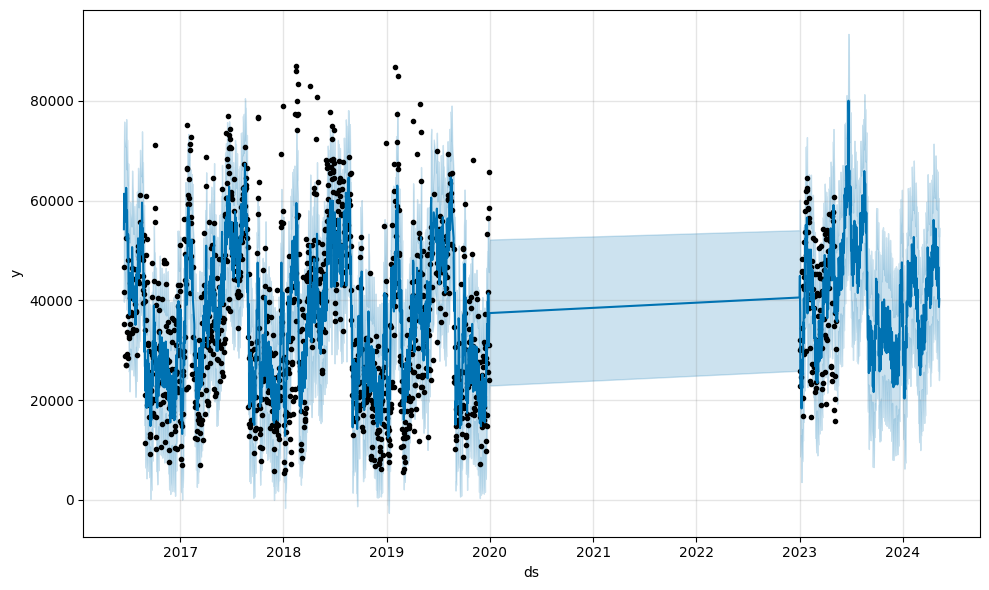

In [219]:
from holiday import holidays
allholidays = pd.concat((holidays(), badweathers))
m = Prophet(holidays = allholidays, yearly_seasonality = 20)
# m.add_country_holidays(country_name='CN')
m.fit(data)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

In [220]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,badweathers,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-16,34133.317921,39745.428825,68749.138110,34133.317921,34133.317921,20125.720743,20125.720743,20125.720743,0.0,...,-1587.505907,-1587.505907,-1587.505907,21713.226650,21713.226650,21713.226650,0.0,0.0,0.0,54259.038664
1,2016-06-17,34133.273725,45846.970144,75845.661536,34133.273725,34133.273725,27258.320439,27258.320439,27258.320439,0.0,...,5164.600727,5164.600727,5164.600727,22093.719712,22093.719712,22093.719712,0.0,0.0,0.0,61391.594164
2,2016-06-18,34133.229528,44138.304687,72413.957777,34133.229528,34133.229528,25070.176627,25070.176627,25070.176627,0.0,...,2608.112175,2608.112175,2608.112175,22462.064452,22462.064452,22462.064452,0.0,0.0,0.0,59203.406155
3,2016-06-21,34133.096939,40500.506340,70929.902029,34133.096939,34133.096939,21689.483436,21689.483436,21689.483436,0.0,...,-1709.003536,-1709.003536,-1709.003536,23398.486972,23398.486972,23398.486972,0.0,0.0,0.0,55822.580375
4,2016-06-23,34133.008546,41366.106576,70820.994173,34133.008546,34133.008546,21929.717499,21929.717499,21929.717499,0.0,...,-1587.505907,-1587.505907,-1587.505907,23517.223405,23517.223405,23517.223405,0.0,0.0,0.0,56062.726045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,2024-05-05,42069.535040,25956.370468,54585.893168,41747.957448,42409.588504,-1703.745058,-1703.745058,-1703.745058,0.0,...,-3894.284580,-3894.284580,-3894.284580,2190.539522,2190.539522,2190.539522,0.0,0.0,0.0,40365.789983
1738,2024-05-06,42074.831315,32743.180711,60535.790778,41753.291735,42416.628558,4627.333085,4627.333085,4627.333085,0.0,...,3102.338049,3102.338049,3102.338049,1524.995036,1524.995036,1524.995036,0.0,0.0,0.0,46702.164400
1739,2024-05-07,42080.127589,26852.094387,55712.982423,41757.180169,42423.668612,-838.384469,-838.384469,-838.384469,0.0,...,-1709.003536,-1709.003536,-1709.003536,870.619067,870.619067,870.619067,0.0,0.0,0.0,41241.743120
1740,2024-05-08,42085.423863,24013.376655,52790.227437,41762.972392,42430.708666,-3420.062490,-3420.062490,-3420.062490,0.0,...,-3684.256929,-3684.256929,-3684.256929,264.194438,264.194438,264.194438,0.0,0.0,0.0,38665.361373


In [225]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()


INFO:prophet:Making 3 forecasts with cutoffs between 2018-07-04 00:00:00 and 2022-05-10 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.734
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1117.85   2.49665e-05       62.4251      0.4944      0.4944      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       1117.85    3.8818e-06       62.5589   5.925e-08       0.001      228  LS failed, Hessian reset 
     154       1117.85   8.73873e-08       59.2695      0.9469      0.9469      252   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.7267
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1407.18   0.000164751       55.2228           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127        1407.2   4.71031e-05       76.4888   5.231e-07       0.001      199  LS failed, Hessian reset 
     199       1407.26   0.000645894       67.5986           1           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1407.38    3.3499e-05         69.45      0.4626      0.4626      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388       1407.39   7.41363e-06       66.6718    9.48e-08       0.001      593  LS failed, Hessian reset 
     399       1407.39   7.07463e-07       65.3415      0.7436      0.7436      609   
    Iter      log pro

/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.6059
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       1939.68   0.000825567       88.2787   1.155e-05       0.001      142  LS failed, Hessian reset 
      99       1939.74    0.00034092       47.8593           1           1      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1940.01   0.000134356       62.3501      0.7865      0.7865      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       1940.41    0.00331551         92.89   3.726e-05       0.001      385  LS failed, Hessian reset 
     299        1940.6   0.000120791       66.1169           1           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1940.62   1.85072e-07        67.413      0.6876      0.6876      549   
    Iter      log pro

/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-07-05,55781.369139,42259.268010,69936.117727,43200,2018-07-04
1,2018-07-06,62016.025879,47714.426365,76789.397364,42000,2018-07-04
2,2018-07-07,59531.851140,45015.580835,73634.017716,61600,2018-07-04
3,2018-07-08,51707.243974,38657.585499,65994.341312,53800,2018-07-04
4,2018-07-09,56324.471691,42075.346027,71382.919491,56200,2018-07-04


/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


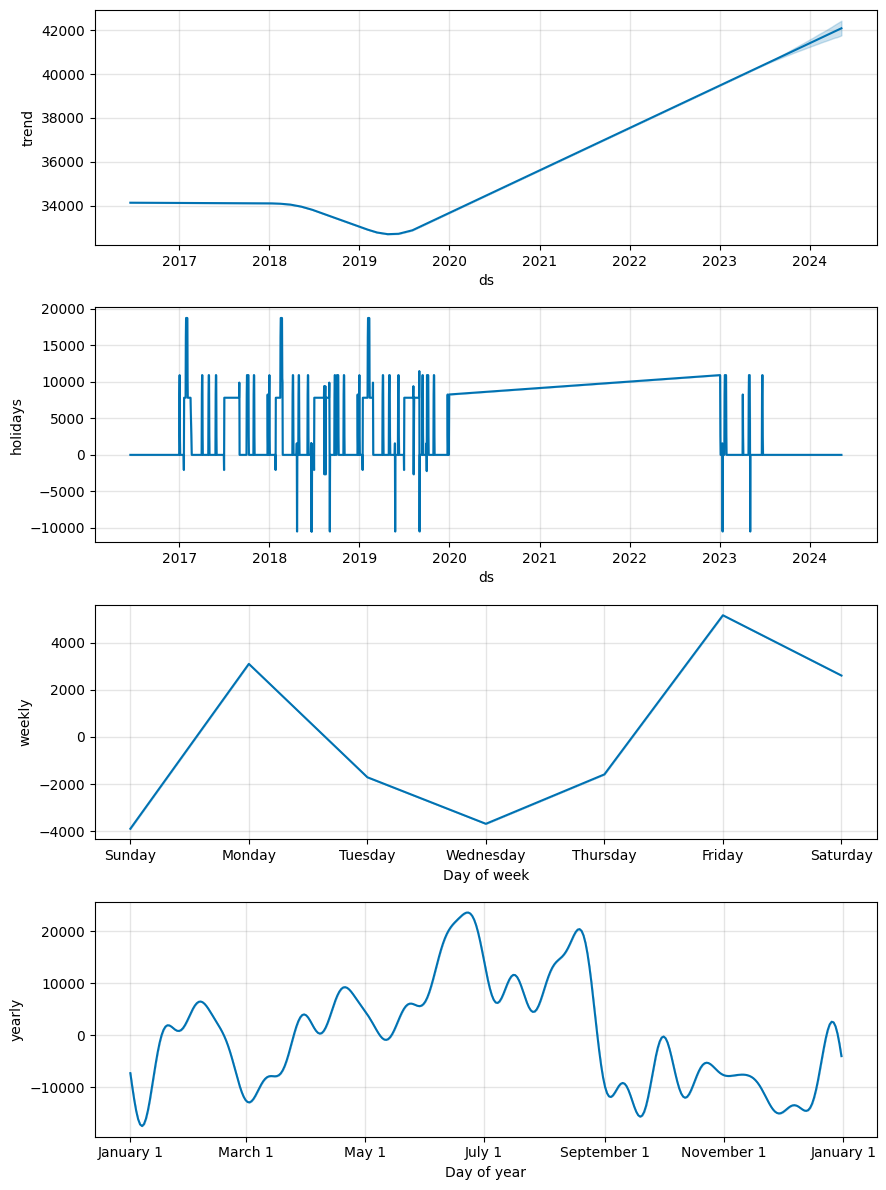

In [221]:
fig2 = m.plot_components(forecast)

In [222]:
# from holidays import country_holidays

# us_holidays = country_holidays('CN', years=2017)

# for day in us_holidays.items():
#     print(day)

# pd.date_range(start='2018-08-08', end = '2018-08-15', freq='D')
# pd.to_datetime(['2018-08-08'])
